<a href="https://colab.research.google.com/github/Strix9289/Introduction-of-Deep-Learning/blob/master/Activation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 活性化関数

In [172]:
#ライブラリ
%matplotlib inline
import numpy as np
import math 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [173]:
#固定変数の定義
e = math.e
pi = math.pi

## 活性化関数が必要な理由


### そもそも深層学習の目的は...

そもそも、深層学習の目標は表現力の高い関数を作り出すことでした。

もう少し具体的言えば**少ないパラメタで複雑な関数を作り出すこと**です。

しかし、例えば1024次関数を作ろうと思ったら1025個のパラメタが必要になります。

$$f(x)=ax^{1024}+bx^{1023}+cx^{1022}+.........+\varsigma x+\varphi$$

しかし、2次関数を10回重ねることで、同様の1024次関数を作ることができます。
$$f(x)=f(...(f(f(ax^2+bx+c))...)$$

後者の場合、$3\times10 = 30$で済みます。

しかし、1次関数の場合何回重ねても1次関数なので表現力を高めることができません。

In [ ]:
#二次関数を定義
def f(x):
  a = 2
  b = 3
  c = 4
  return a*x**2+b*x+c

#一次関数の定義
def g(x):
  a = 3
  b = 4
  return a*x+b

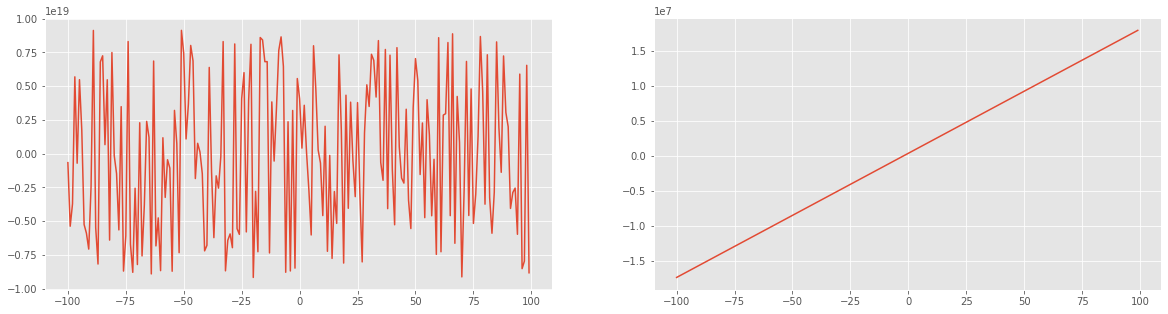

In [ ]:
#@title 関数を重ねる回数をいじってみてください { form-width: "500px" }
loop_times = 10 #@param {type:"slider", min:1, max:20, step:1}

fig = plt.figure(figsize=(20, 5))
x = np.arange(-100,100,1)
#ループを増やして重ねる回数を増やすことで表現できる部分が増えていくのが分かります。
for i in range(loop_times):
  if i == 0:
    y = f(x)
    z = g(x)
  else:
    y = f(y)
    z = g(z)

#左に二次関数、右に一次関数を表示します。
ax_1 = fig.add_subplot(121)
ax_2 = fig.add_subplot(122)
ax_1 = ax_1.plot(x,y)
ax_2 = ax_2.plot(x,z)
plt.show()

### 非線形関数

さて、話がそれましたが、2次関数を重ねることで圧倒的にパラメタ数を削減できましたが、まだ問題があります。

それは、2次関数であっても入力変数を$n$とすると必要なパラメタの数は約$\frac{n^2}{2}$になることです。なぜなら、$n$変数の$d$次斉次多項式の次元は$\begin{eqnarray*}&& {}_{d+n-1} C _d\end{eqnarray*}$となるためです。詳しくはこちら(https://ja.wikipedia.org/wiki/%E6%96%89%E6%AC%A1%E5%A4%9A%E9%A0%85%E5%BC%8F)

つまり、フルHD画像の場合$450$億なので2次関数もきつい...

そこで必要になるのが、一次関数みたいにシンプルで2次関数みたいな複雑な表現ができるものとして、**非線形関数**が登場します。これによって、入力次元$n$に対して$n+1$のパラメタで対応できるようになります!

それでは、代表的な活性化関数であるReLUを使ってみましょう！！

二次関数ほどではありませんが確かにいろいろな値が取れるようになることが確認できると思ます。

In [ ]:
#@title 活性化関数の中のパラメタを変更してみてください { form-width: "600px" }
a = 7.4 #@param {type:"slider", min:-10, max:10, step:0.1}
b = 9.2 #@param {type:"slider", min:-10, max:10, step:0.1}
def r(x):
  z = a*x+b
  return x*(z>0)

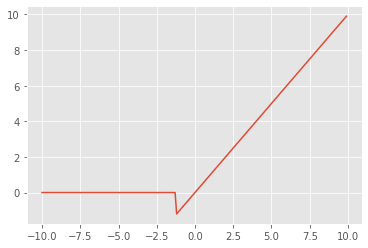

In [180]:
x = np.arange(-10,10,0.1)
for i in range(3):
  if i == 0:
    z = r(x)
  else:
    z = r(z)
plt.plot(x,z)
plt.show()

# 活性化関数：Activate
* sigmoid: $f(x)=\dfrac{1}{1+e^{-x}}$
* ReLU: $f(x)=\max(0,x)$
* tanh: $f(x)=\tanh(x)=\dfrac{e^x-e^{-x}}{e^x+e^{-x}}$
* softmax: $f(x)=\dfrac{\exp(x_d)}{\sum_{d'} \exp(x_{d'})} \quad (x\in\mathbb{R}^D,\ d=1,2,\ldots,D)$ 予想確立を出す

詳細はこちら(https://qiita.com/kuroitu/items/73cd401afd463a78115a)　を参照してください

## シグモイド関数

$$f(x)=\dfrac{1}{1+e^{-x}}$$
$$f'(x)=f(x)(1-f(x))$$

誤差逆伝播法が登場した頃によく使用されていた活性化関数です。

- 入力としてあらゆる実数を受け入れ必ず0~1の間で出力する
- 式がきれいで、微分を出力から簡単に求められる

という特徴があります。

その一方、
- 極端に大きい値や小さい値に対して応答が悪い
- 微分の最大値が0.25

ということもあり現在では中間層では使われることは少なく、2値分類で使われることが増えてきました。

In [ ]:
def sigmoid(x):
  return  1/(1+e**-x)

def deriv_sigmoid(x):
    return np.exp(x)/(1+np.exp(x))**2

<function matplotlib.pyplot.show>

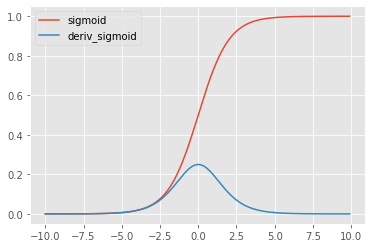

In [194]:
x = np.arange(-10,10,0.1)
y = sigmoid(x)
deriv_y = deriv_sigmoid(x)
plt.plot(x,y)
plt.plot(x,deriv_y)
plt.legend(['sigmoid', 'deriv_sigmoid'])
plt.show

## Tanh

In [ ]:
def tanh(x):
    return np.tanh(x)
#微分
def deriv_tanh(x):
    return 1 - np.tanh(x)**2

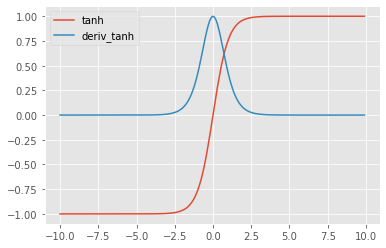

In [195]:
x = np.arange(-10,10,0.1)
y = tanh(x)
deriv_y = deriv_tanh(x)

plt.plot(x,y)
plt.plot(x,deriv_y)

plt.legend(['tanh', 'deriv_tanh'])
plt.show()

## Softmax

入力値を$x_i$とすると大小関係をそのまま$$0<y_i<1$$$$y_1+y_2+...+y_n=1$$

となるため、どのような値を入力しても確率分布を満たしてくれるようになります。

そのため、機械学習の分類問題の最後の活性化関数として利用されることが多いです。

In [ ]:
# ソフトマックス関数を定義
def softmax(x):
    u = np.sum(np.exp(x))
    return np.exp(x)/u

In [ ]:
x = np.array([1,2,3])
y = softmax(x)

#以下見やすいように整形
df = pd.DataFrame()
df["x"] = x
df["y"] = y
df

,x,y
0,1,0.090031
1,2,0.244728
2,3,0.665241


## ReLU

深層学習の発展に最も寄与した関数ともいわれています。
また、後述の**勾配消失**が起こりにくい関数でもあります。

In [208]:
def ReLU(x):
  return x * (x > 0)

def deriv_relu(x):
    return 1 * (x > 0)

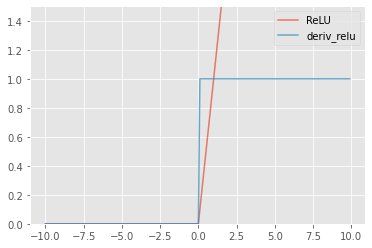

In [217]:
x = np.arange(-10,10,0.1)

plt.plot(x, ReLU(x), alpha=0.7)
plt.plot(x, deriv_relu(x),alpha=0.7)
plt.ylim([0,1.5])
plt.legend(["ReLU", "deriv_relu"])
plt.show()

## Leaky ReLU

ReLUの改良版。ReLUは負の入力に対して学習が進まないという問題があった。そこでそれを解決するために負の入力に対してごくわずかな傾きを加えたものです。しかし、実際はReLUの方が精度がいい場合もある。

$$f(x)= \begin{cases}x & (x> 0)\\0.01x & (x\le 0)\end{cases}$$


$$f'(x)= \begin{cases}1 & (x> 0)\\0.01 & (x\le 0)\end{cases}$$

In [219]:
def Leaky_ReLU(x):
  return np.where(x>0,x, 0.01*x)

def deriv_leaky_relu(x):
  return np.where(x>0, 1, 0.01)

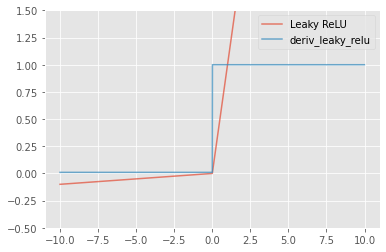

In [223]:
x = np.arange(-10,10,0.01)

plt.plot(x, Leaky_ReLU(x), alpha=0.7)
plt.plot(x, deriv_leaky_relu(x),alpha=0.7)
plt.ylim([-0.5,1.5])
plt.legend(["Leaky ReLU", "deriv_leaky_relu"])
plt.show()

## ELU

## PReLU

## SELU

SELUはReLUを含めたLeaky ReLUやParametric ReLU(PReLU)の拡張版

$$f(x)=\lambda \begin{cases} \alpha(e^x-1) & x\le 0\\x & x> 0\end{cases}$$
$$\lambda\simeq1.0507009873554804934193349852946$$
$$\alpha\simeq1.6732632423543772848170429916717$$

In [174]:
SCALE = 1.0507009873554804934193349852946
ALPHA = 1.6732632423543772848170429916717

def selu(x, scale=SCALE, alpha=ALPHA):
  return scale * np.where(x > 0.0, x, alpha * (np.exp(x) - 1))

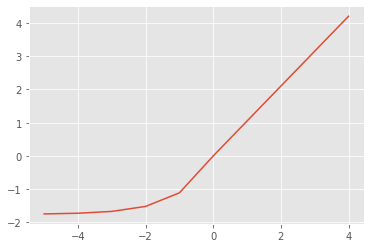

In [177]:
x = np.arange(-5,5,1)
y = selu(x)

plt.plot(x,y)
plt.show()

## Swish

# 勾配消失問題

**勾配消失問題**：勾配の値が0にないそれ以上学習が進まなくなってしまう現象。

ニューラルネットワークは**誤差逆電波法**によって、勾配が計算されています。

つまり、**(ある層の勾配) = (1層前の勾配) x (2層前の勾配) x ... x (出力層の勾配)**と積の形で求めるため、

途中のから勾配の大きさが小さくなると入力層付近の勾配はどんどん0に近づていきます。層を深くするとより一層勾配消失の影響が大きくなってしまいます。

それでは、紹介してきた活性化関数の微分系を見てみましょう。



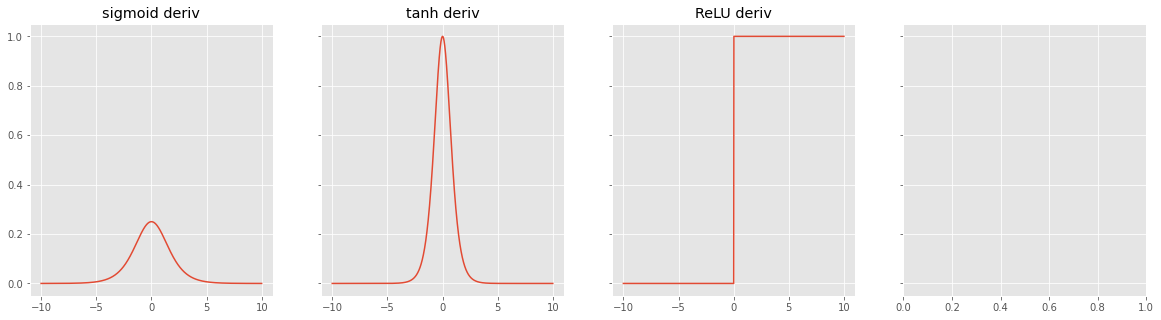

In [187]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5),sharey='row')

x = np.arange(-10, 10, 0.01)

# sigmoid
axes.ravel()[0].plot(x, deriv_sigmoid(x))
axes.ravel()[0].set_title('sigmoid deriv')
#axes.ravel()[0].ylim([-1,1])
# tanh
axes.ravel()[1].plot(x, deriv_tanh(x)) 
axes.ravel()[1].set_title('tanh deriv')
#axes.ravel()[1].ylim([-1,1])
# relu
axes.ravel()[2].plot(x, deriv_relu(x))
axes.ravel()[2].set_title('ReLU deriv')
#axes.ravel()[3].ylim([-1,1])

plt.show()

- sigmoidの場合、そもそも**最大値が0.25**であるためすぐに勾配がほど0になってしまいます。
- Tanhの場合、**最大値は1**ですが、入力値が0から離れると**勾配が0に近くなる**ため、層が深くなると最適化が進みづらくなります。
- ReLUの場合、**常に勾配が1**。前の層に勾配が伝わりやすく演算もシンプルで端末実装も容易です。
- LeakyReLU: 0よりも小さな値にも勾配があり、勾配もパラメタとして学習できるPReLUもある。実装が重い
- ELU: 0よりも小さな値にも滑らかに変化する勾配がある。Softplus、SELUもこれに近い関数。実装が重い
‐ CReLU: CNNのフィルタには単純に符合を反転させたもののペアが存在する場合がある。これをCReLUを実装することで符号反転バージョンを作り、パラメタ数を減らすことができる。
- Swish: 強化学習を用いて発見された活性化関数。

勾配消失の対策としては、**ショートカット**と呼ばれる手法があります。

これは、各層の出力にその層への入力だったものも加えてしまうという手法です。

現在編集中


# 勾配爆発問題

勾配消失問題の逆で、勾配の大きさが大きくなりすぎてオーバーフローしてしまう現象。

対策としては、**勾配クリッピング**があります。これを行うことで過剰に勾配が増大することを抑制し、探索を順当に進めることができます。ただし、制限値を小さくしすぎると学習のスピードが落ちます。

In [ ]:
from tensorflow.keras import optimizers

sgd = optimizers.SGD(lr=0.01, clipnorm=1.)    # clipnormは勾配の2乗ノルムの最大値を制限する
sgd2 = optimizers.SGD(lr=0.01, clipvalue=1.)  # clipvalueは勾配の"要素"の絶対値の大きさを制限する
# clipnormの方が勾配の方向を変えないという利点があるが、経験的にはどちらの振る舞いも大差ない

ada = optimizers.Adagrad(lr=0.01, clipnorm=1.)# SGDに限らずすべてのoptimizerで指定可能
